In [3]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aamir\\AppData\\Roaming\\Python\\Python39\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.



In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\aamir\\Documents\\DATA SCIENCE\\.spyder-py3\\working practice\\forestfires.csv')
df
print(df.head())
list(df)


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

['month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'size_category']

In [9]:
X = df.drop('size_category', axis=1)
y = df['monthsep']


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'sep'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression


NameError: name 'Sequential' is not defined

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

from tensorflow.keras.models import Sequential
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


NameError: name 'model' is not defined

In [17]:
import pandas as pd

df = pd.read_csv('C:\\Users\\aamir\\Documents\\DATA SCIENCE\\.spyder-py3\\working practice\\gas_turbines.csv')
df
print(df.head())


       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311  


In [18]:
X = df.drop('TEY', axis=1)
y = df['TEY']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test_scaled)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 0.49
R-squared (R2) Score: 1.00


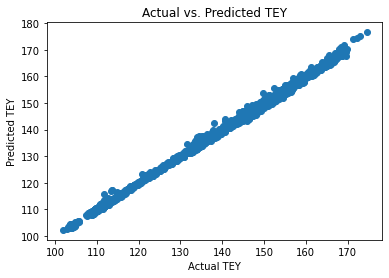

In [25]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.title("Actual vs. Predicted TEY")
plt.show()
